In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=7a8094633c71a5fb39c49ee607780c00987b4c614459ab62cf88e22aaba5b4c0
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [4]:
spark = SparkSession.builder.appName('craiglist').getOrCreate()

In [5]:
# Define the schema
schema = StructType([
    StructField("SrNo", IntegerType(), True),
    StructField("id", LongType(), True),
    StructField("url", StringType(), True),
    StructField("region", StringType(), True),
    StructField("region_url", StringType(), True),
    StructField("price", IntegerType(), True),
    StructField("year", StringType(), True),
    StructField("manufacturer", StringType(), True),
    StructField("model", StringType(), True),
    StructField("condition", StringType(), True),
    StructField("cylinders", StringType(), True),
    StructField("fuel", StringType(), True),
    StructField("odometer", IntegerType(), True),
    StructField("title_status", StringType(), True),
    StructField("transmission", StringType(), True),
    StructField("VIN", StringType(), True),
    StructField("drive", StringType(), True),
    StructField("size", StringType(), True),
    StructField("type", StringType(), True),
    StructField("paint_color", StringType(), True),
    StructField("image_url", StringType(), True),
    StructField("description", StringType(), True),
    StructField("county", StringType(), True),
    StructField("state", StringType(), True),
    StructField("lat", DoubleType(), True),
    StructField("long", DoubleType(), True),
    StructField("posting_date", TimestampType(), True),
    StructField("removal_date", TimestampType(), True)
])


In [6]:
craiglist_Vehicles_path = '/content/drive/MyDrive/craigslist_vehicles.csv'
craiglist_df = spark.read.format('csv').option('inferSchema',False).schema(schema).option('header',True).load(craiglist_Vehicles_path )

In [7]:
craiglist_df.show(40, truncate=0)

+------+----------+---------------------------------------------------------------------------------------------+-------+------------------------------+-------+------+------------+--------------------+---------+-----------+------+--------+------------+------------+-----------------+-----+-----------+--------+-----------+-------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
shape_First = (craiglist_df.count(), len(craiglist_df.columns))
print(shape_First)

(441802, 28)


In [9]:
first_change_df=craiglist_df.drop('SrNo','url','region_url','cylinders','image_url','description','county','state')

In [10]:
first_change_df.show(40)

+----------+-------+-------+------+------------+--------------------+---------+------+--------+------------+------------+-----------------+-----+-----------+--------+-----------+---------+----------+-------------------+-------------------+
|        id| region|  price|  year|manufacturer|               model|condition|  fuel|odometer|title_status|transmission|              VIN|drive|       size|    type|paint_color|      lat|      long|       posting_date|       removal_date|
+----------+-------+-------+------+------------+--------------------+---------+------+--------+------------+------------+-----------------+-----+-----------+--------+-----------+---------+----------+-------------------+-------------------+
|7307679724|abilene|   4500|2002.0|         bmw|                  x5|     null|   gas|    null|       clean|   automatic|             null| null|       null|    null|       null|32.401556|-99.884713|2021-04-16 00:00:00|2021-05-02 00:00:00|
|7311833696|abilene|   4500|2002.0|     

In [11]:
# Drop rows with null values in the specified columns
columns_to_check = ["id","lat", "long", "posting_date","removal_date"]
df_filtered = first_change_df.na.drop(subset=columns_to_check)

In [12]:
df_filtered.show(5)

+----------+-------+-----+------+------------+----------+---------+----+--------+------------+------------+----+-----+----+-----+-----------+---------+----------+-------------------+-------------------+
|        id| region|price|  year|manufacturer|     model|condition|fuel|odometer|title_status|transmission| VIN|drive|size| type|paint_color|      lat|      long|       posting_date|       removal_date|
+----------+-------+-----+------+------------+----------+---------+----+--------+------------+------------+----+-----+----+-----+-----------+---------+----------+-------------------+-------------------+
|7307679724|abilene| 4500|2002.0|         bmw|        x5|     null| gas|    null|       clean|   automatic|null| null|null| null|       null|32.401556|-99.884713|2021-04-16 00:00:00|2021-05-02 00:00:00|
|7311833696|abilene| 4500|2002.0|         bmw|        x5|     null| gas|    null|       clean|   automatic|null| null|null| null|       null|32.401556|-99.884713|2021-04-24 00:00:00|2021-0

In [13]:
shape_Second = (df_filtered.count(), len(df_filtered.columns))
print(shape_Second)

(360219, 20)


In [14]:
df_grouped = df_filtered.groupBy("region").agg(count('*')).orderBy('region')

In [15]:
df_grouped.show(truncate=0)

+--------------------+--------+
|region              |count(1)|
+--------------------+--------+
|SF bay area         |2586    |
|abilene             |183     |
|akron / canton      |1863    |
|albany              |2360    |
|albuquerque         |2299    |
|altoona-johnstown   |343     |
|amarillo            |464     |
|ames                |144     |
|anchorage / mat-su  |2410    |
|ann arbor           |1041    |
|annapolis           |280     |
|appleton-oshkosh-FDL|1102    |
|asheville           |1164    |
|ashtabula           |268     |
|athens              |583     |
|atlanta             |2599    |
|auburn              |139     |
|augusta             |440     |
|austin              |2570    |
|bakersfield         |2121    |
+--------------------+--------+
only showing top 20 rows



In [16]:
shape_t = (df_grouped.count())
print(shape_t)

404


In [17]:
# Number of partitions after reading from hdfs
print(f'Number of partitions: {df_grouped.rdd.getNumPartitions()}')

Number of partitions: 1


In [18]:
# Number of partitions after reading from hdfs
print(f'Number of partitions: {df_filtered.rdd.getNumPartitions()}')

Number of partitions: 11


In [19]:
from pyspark.sql.window import Window

In [20]:
#Set up window specifications for aggregation
window_day = Window.partitionBy("region", date_trunc("day", col("posting_date")))
window_week = Window.partitionBy("region", date_trunc("week", col("posting_date")))
window_month = Window.partitionBy("region", date_trunc("month", col("posting_date")))
window_quarter = Window.partitionBy("region", year(col("posting_date")), quarter(col("posting_date")))


In [21]:
# Calculate counts for different time granularities
df_daily = df_filtered.withColumn("daily_count", count("id").over(window_day))


In [22]:
df_daily.show(truncate=0)

+----------+-----------+-------+------+------------+---------------------------+---------+------+--------+------------+------------+-----------------+-----+----+-----+-----------+---------+----------+-------------------+-------------------+-----------+
|id        |region     |price  |year  |manufacturer|model                      |condition|fuel  |odometer|title_status|transmission|VIN              |drive|size|type |paint_color|lat      |long      |posting_date       |removal_date       |daily_count|
+----------+-----------+-------+------+------------+---------------------------+---------+------+--------+------------+------------+-----------------+-----+----+-----+-----------+---------+----------+-------------------+-------------------+-----------+
|7316837418|SF bay area|17991  |2019.0|nissan      |sentra                     |excellent|gas   |null    |clean       |automatic   |3N1AB7AP0KY374770|fwd  |null|sedan|null       |2015.0   |2014.0    |2012-01-01 00:00:00|2010-01-01 00:00:00|1

In [23]:
df_weekly = df_daily.withColumn("weekly_count", count("id").over(window_week))


In [24]:
df_weekly.show(5)

+----------+-----------+-----+------+-------------+------------------+---------+-----+--------+------------+------------+-----------------+-----+---------+-----+-----------+---------+-----------+-------------------+-------------------+-----------+------------+
|        id|     region|price|  year| manufacturer|             model|condition| fuel|odometer|title_status|transmission|              VIN|drive|     size| type|paint_color|      lat|       long|       posting_date|       removal_date|daily_count|weekly_count|
+----------+-----------+-----+------+-------------+------------------+---------+-----+--------+------------+------------+-----------------+-----+---------+-----+-----------+---------+-----------+-------------------+-------------------+-----------+------------+
|7316837418|SF bay area|17991|2019.0|       nissan|            sentra|excellent|  gas|    null|       clean|   automatic|3N1AB7AP0KY374770|  fwd|     null|sedan|       null|   2015.0|     2014.0|2012-01-01 00:00:00|20

In [25]:
df_monthly = df_weekly.withColumn("monthly_count", count("id").over(window_month))


In [26]:
df_monthly.show(5)

+----------+-----------+-----+------+------------+-----------+---------+----+--------+------------+------------+-----------------+-----+----+-----+-----------+---------+----------+-------------------+-------------------+-----------+------------+-------------+
|        id|     region|price|  year|manufacturer|      model|condition|fuel|odometer|title_status|transmission|              VIN|drive|size| type|paint_color|      lat|      long|       posting_date|       removal_date|daily_count|weekly_count|monthly_count|
+----------+-----------+-----+------+------------+-----------+---------+----+--------+------------+------------+-----------------+-----+----+-----+-----------+---------+----------+-------------------+-------------------+-----------+------------+-------------+
|7316837418|SF bay area|17991|2019.0|      nissan|     sentra|excellent| gas|    null|       clean|   automatic|3N1AB7AP0KY374770|  fwd|null|sedan|       null|   2015.0|    2014.0|2012-01-01 00:00:00|2010-01-01 00:00:00|

In [27]:
df_quarterly = df_monthly.withColumn("quarterly_count", count("id").over(window_quarter))

In [28]:
df_quarterly.show(5)

+----------+-----------+-----+------+-------------+------------------+---------+-----+--------+------------+------------+-----------------+-----+---------+-----+-----------+---------+-----------+-------------------+-------------------+-----------+------------+-------------+---------------+
|        id|     region|price|  year| manufacturer|             model|condition| fuel|odometer|title_status|transmission|              VIN|drive|     size| type|paint_color|      lat|       long|       posting_date|       removal_date|daily_count|weekly_count|monthly_count|quarterly_count|
+----------+-----------+-----+------+-------------+------------------+---------+-----+--------+------------+------------+-----------------+-----+---------+-----+-----------+---------+-----------+-------------------+-------------------+-----------+------------+-------------+---------------+
|7316837418|SF bay area|17991|2019.0|       nissan|            sentra|excellent|  gas|    null|       clean|   automatic|3N1AB7

In [29]:
granular_df=df_quarterly.select("id","region","year","manufacturer","model","type","lat","long","posting_date","daily_count","weekly_count","monthly_count","quarterly_count")

In [30]:
granular_df_final=granular_df.withColumn("posting_date_day",date_trunc("day", col("posting_date"))).withColumn("posting_week",date_trunc("week", col("posting_date"))).withColumn("posting_month",date_trunc("month", col("posting_date")))

In [31]:
granular_df_final.show()

+----------+-----------+------+-------------+--------------------+------+---------+-----------+-------------------+-----------+------------+-------------+---------------+-------------------+-------------------+-------------------+
|        id|     region|  year| manufacturer|               model|  type|      lat|       long|       posting_date|daily_count|weekly_count|monthly_count|quarterly_count|   posting_date_day|       posting_week|      posting_month|
+----------+-----------+------+-------------+--------------------+------+---------+-----------+-------------------+-----------+------------+-------------+---------------+-------------------+-------------------+-------------------+
|7316837418|SF bay area|2019.0|       nissan|              sentra| sedan|   2015.0|     2014.0|2012-01-01 00:00:00|          1|           1|            1|              1|2012-01-01 00:00:00|2011-12-26 00:00:00|2012-01-01 00:00:00|
|7316321122|SF bay area|2009.0|mercedes-benz|             c class| sedan|   

In [32]:
# Group by "region" and counting the number of listings
region_counts = df_filtered.groupBy("region").agg(count("*").alias("listing_count"))

# Sorting the results in descending order
sorted_regions = region_counts.orderBy(desc("listing_count"))

# Selecting the top 10 regions
top_10_regions = sorted_regions.limit(10)

In [33]:
top_10_regions.show()

+------------------+-------------+
|            region|listing_count|
+------------------+-------------+
|          columbus|         2931|
|      south jersey|         2808|
|        central NJ|         2784|
|         nashville|         2771|
|      st louis, MO|         2747|
|sarasota-bradenton|         2745|
|      north jersey|         2741|
|         rochester|         2719|
|   kansas city, MO|         2707|
|       san antonio|         2703|
+------------------+-------------+



In [34]:
# Creating a list of top 10 regions
top_10_regions_list = top_10_regions.select("region").rdd.flatMap(lambda x: x).collect()

In [35]:
# Printing the list of top 10 regions
print("Top 10 regions:", top_10_regions_list)

Top 10 regions: ['columbus', 'south jersey', 'central NJ', 'nashville', 'st louis, MO', 'sarasota-bradenton', 'north jersey', 'rochester', 'kansas city, MO', 'san antonio']


In [36]:
# Perform filtering based on regions
filtered_df_region = granular_df_final.filter(col("region").isin(top_10_regions_list))

In [37]:
# Group by "manufacturer" and counting the number of listings
manufacturer_counts = df_filtered.groupBy("manufacturer").agg(count("*").alias("manufacturer_count"))

# Sorting the results in descending order
sorted_manufacturer = manufacturer_counts.orderBy(desc("manufacturer_count"))

# Selecting the top 10 regions
top_10_manufacturer = sorted_manufacturer.limit(10)

# Creating a list of top 10 regions
top_10_manufacturer_list = top_10_manufacturer.select("manufacturer").rdd.flatMap(lambda x: x).collect()

In [51]:
# Perform filtering based on manufacturer
filtered_df_manufacturer = granular_df_final.filter(col("manufacturer").isin(top_10_manufacturer_list))

In [39]:
top_10_manufacturer.show()
print("Top 10 regions:", top_10_manufacturer_list)

+------------+------------------+
|manufacturer|manufacturer_count|
+------------+------------------+
|        ford|             58264|
|   chevrolet|             46270|
|      toyota|             28697|
|       honda|             18723|
|      nissan|             16638|
|        jeep|             15384|
|        null|             15157|
|         gmc|             13418|
|         ram|             13095|
|         bmw|             12378|
+------------+------------------+

Top 10 regions: ['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep', None, 'gmc', 'ram', 'bmw']


In [45]:
# Group by "vehicle_type" and counting the number of listings
vehicle_type = df_filtered.groupBy("type").agg(count("*").alias("vehicle_type_count"))

# Sorting the results in descending order
sorted_vehicle_type= vehicle_type.orderBy(desc("vehicle_type_count"))

# Selecting the top 10 regions
top_10_vehicle_type = sorted_vehicle_type.limit(10)

# Creating a list of top 10 regions
top_10_vehicle_type_list = top_10_vehicle_type.select("type").rdd.flatMap(lambda x: x).collect()

In [52]:
# Perform filtering based on type
filtered_df_type = granular_df_final.filter(col("type").isin(top_10_vehicle_type_list))

In [46]:
top_10_vehicle_type.show()
print("Top 10 regions:", top_10_vehicle_type_list)

+---------+------------------+
|     type|vehicle_type_count|
+---------+------------------+
|     null|             81686|
|    sedan|             75507|
|      SUV|             62348|
|   pickup|             36279|
|    truck|             24660|
|    other|             19285|
|    coupe|             17243|
|hatchback|             15130|
|    wagon|              8802|
|      van|              7000|
+---------+------------------+

Top 10 regions: [None, 'sedan', 'SUV', 'pickup', 'truck', 'other', 'coupe', 'hatchback', 'wagon', 'van']


In [50]:
filtered_df_condition = df_filtered.filter(col("condition") == "excellent")
filtered_df_condition.show(5)

+----------+-------+-----+------+------------+--------------------+---------+------+--------+------------+------------+-----------------+-----+---------+--------+-----------+---------+----------+-------------------+-------------------+
|        id| region|price|  year|manufacturer|               model|condition|  fuel|odometer|title_status|transmission|              VIN|drive|     size|    type|paint_color|      lat|      long|       posting_date|       removal_date|
+----------+-------+-----+------+------------+--------------------+---------+------+--------+------------+------------+-----------------+-----+---------+--------+-----------+---------+----------+-------------------+-------------------+
|7311441996|abilene| 4900|2006.0|      toyota|               camry|excellent|   gas|    null|       clean|   automatic|             null|  fwd|     null|   sedan|     silver|32.453848|  -99.7879|2021-04-23 00:00:00|2021-05-25 00:00:00|
|7311441803|abilene|11500|2014.0|       honda|          

In [55]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  se

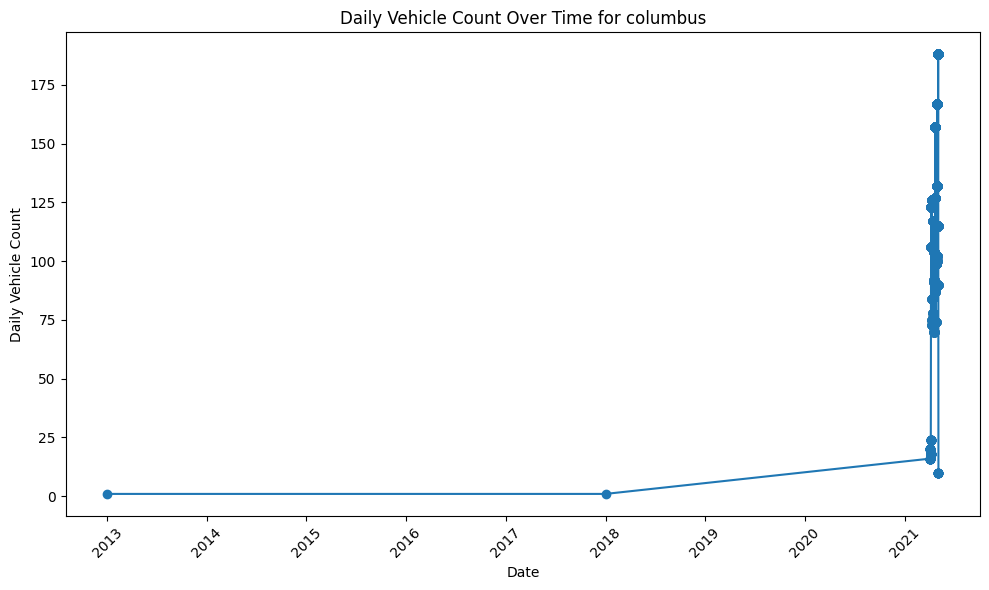

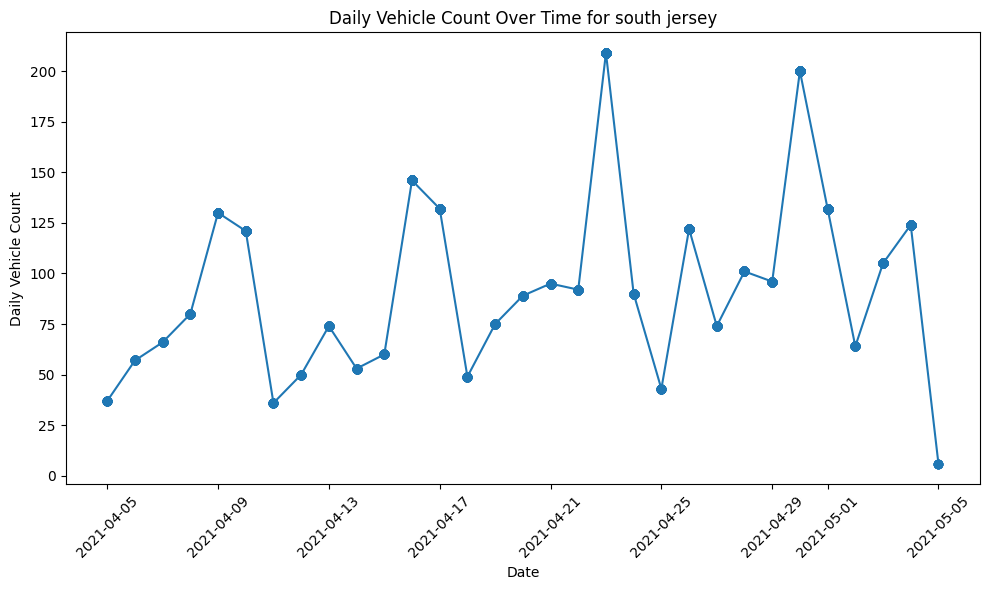

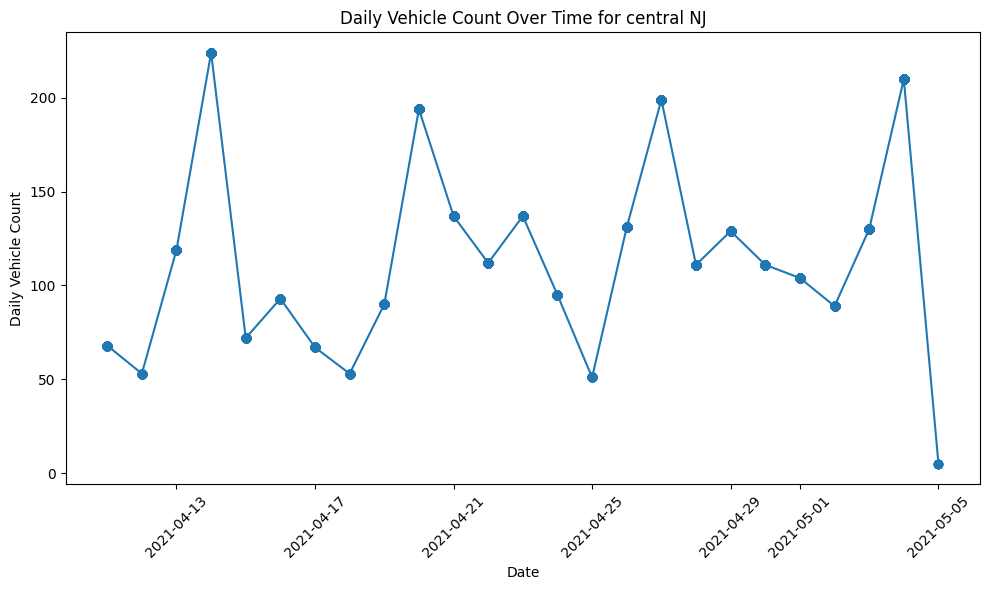

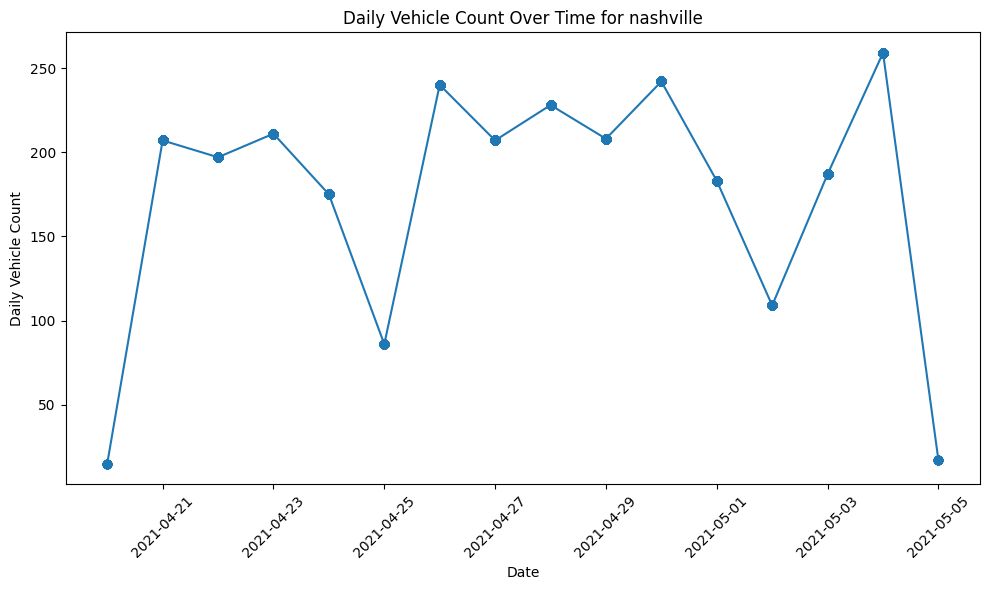

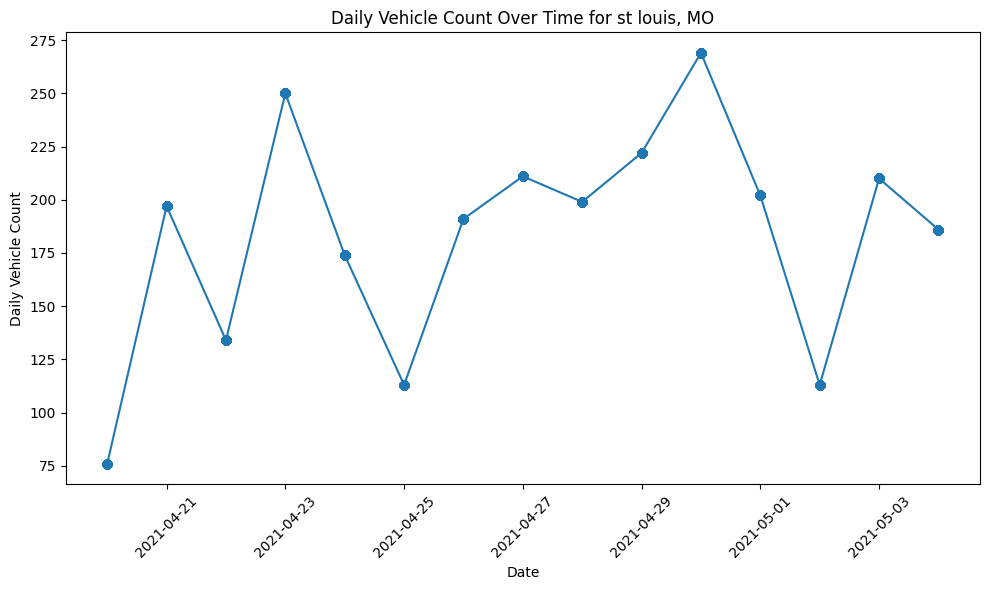

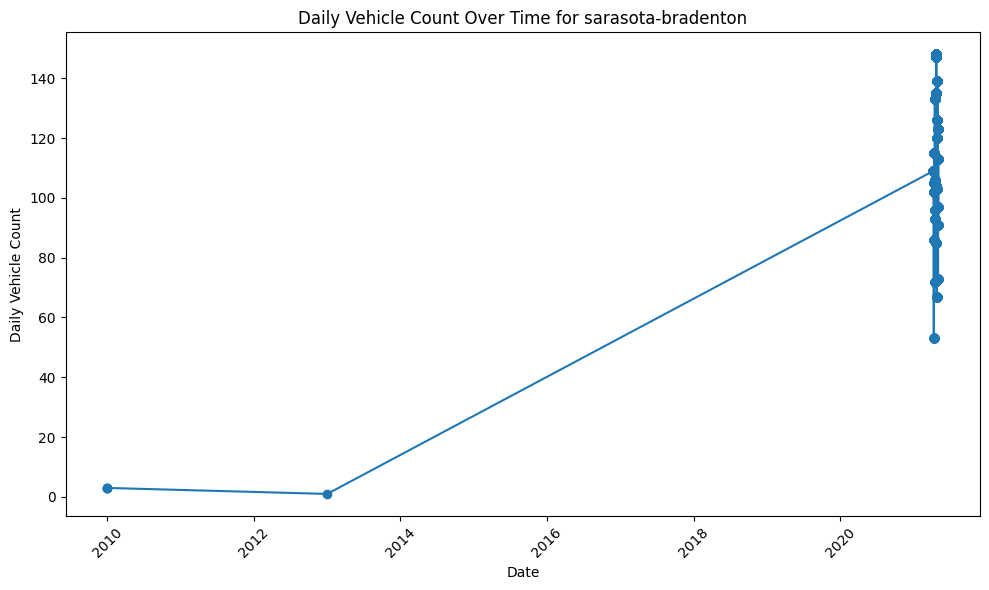

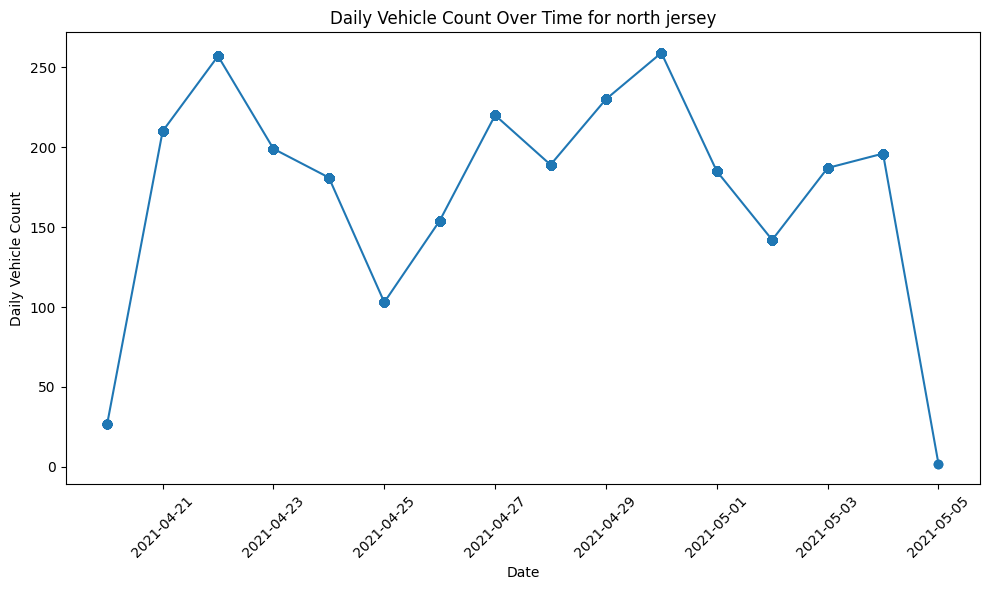

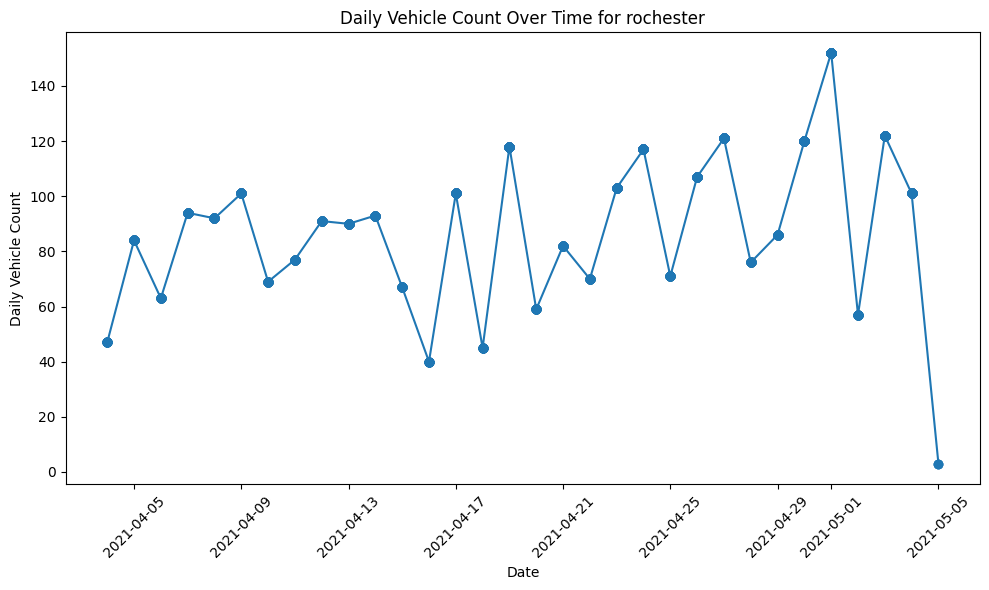

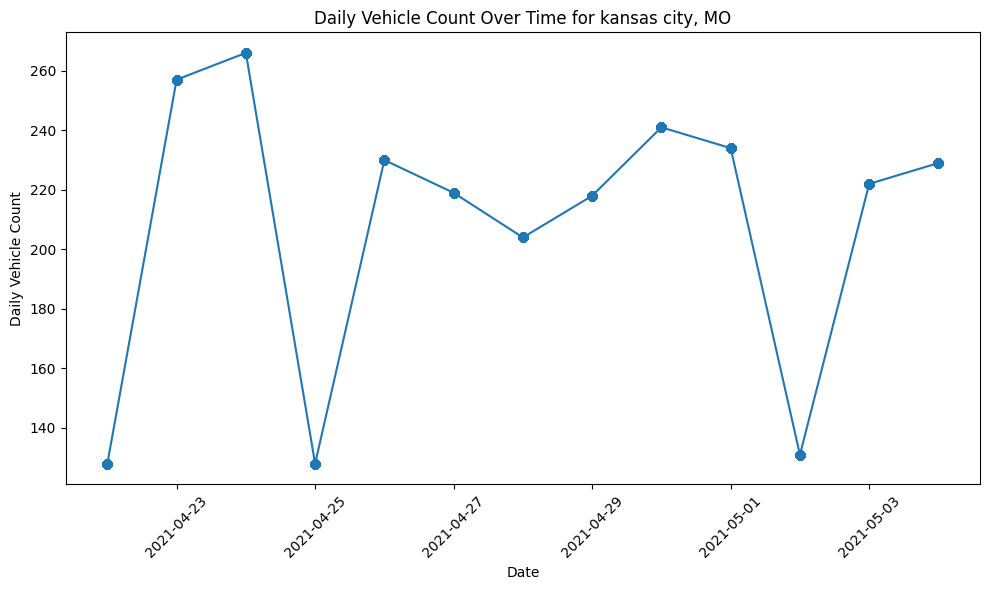

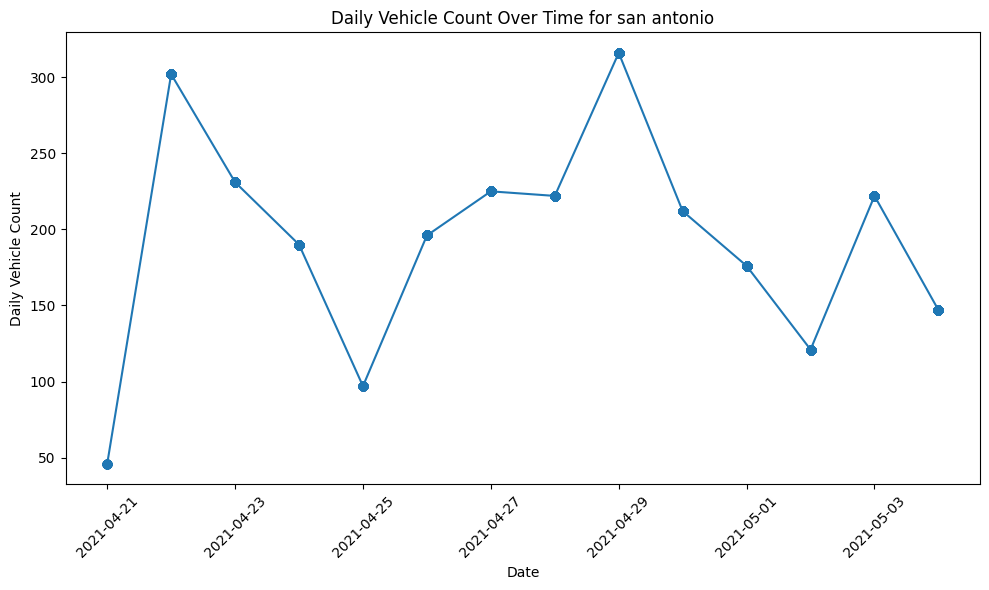

In [ ]:
# Converting the DataFrame to Pandas for visualization
filtered_pandas_df = filtered_df_region.toPandas()

# Creating time-series visualizations for different regions
regions_to_analyze = ['columbus', 'south jersey', 'central NJ', 'nashville', 'st louis, MO', 'sarasota-bradenton', 'north jersey', 'rochester', 'kansas city, MO', 'san antonio']

for region in regions_to_analyze:
    region_data = filtered_pandas_df[filtered_pandas_df['region'] == region]

    plt.figure(figsize=(10, 6))
    plt.plot(region_data['posting_date_day'], region_data['daily_count'], marker='o')
    plt.xlabel("Date")
    plt.ylabel("Daily Vehicle Count")
    plt.title(f"Daily Vehicle Count Over Time for {region}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  se

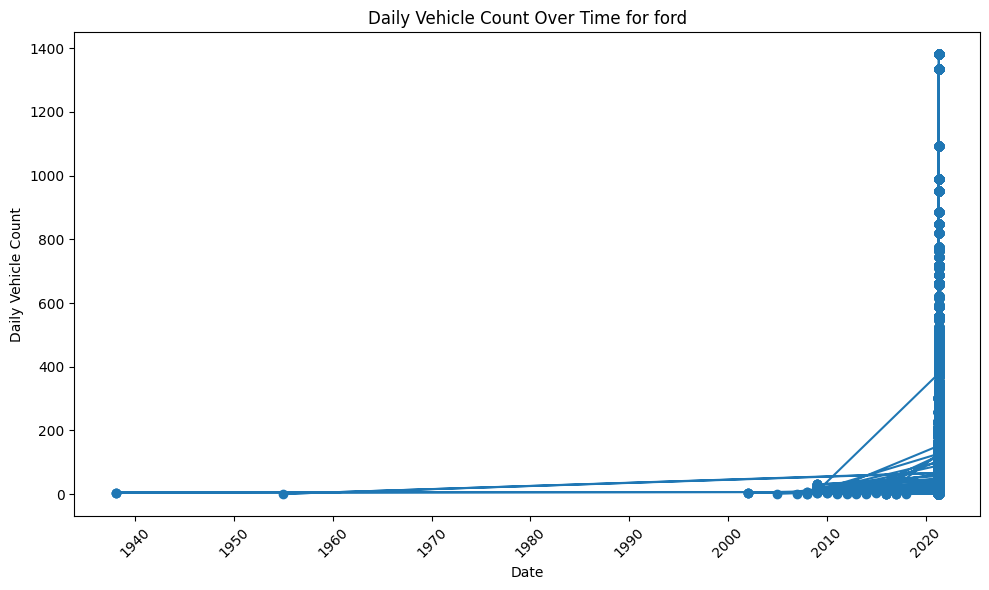

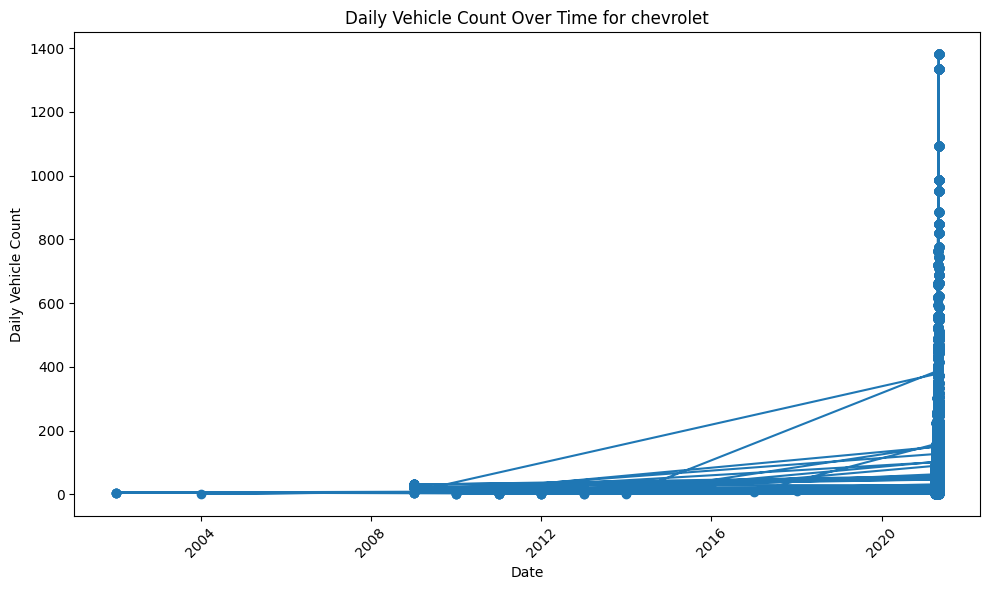

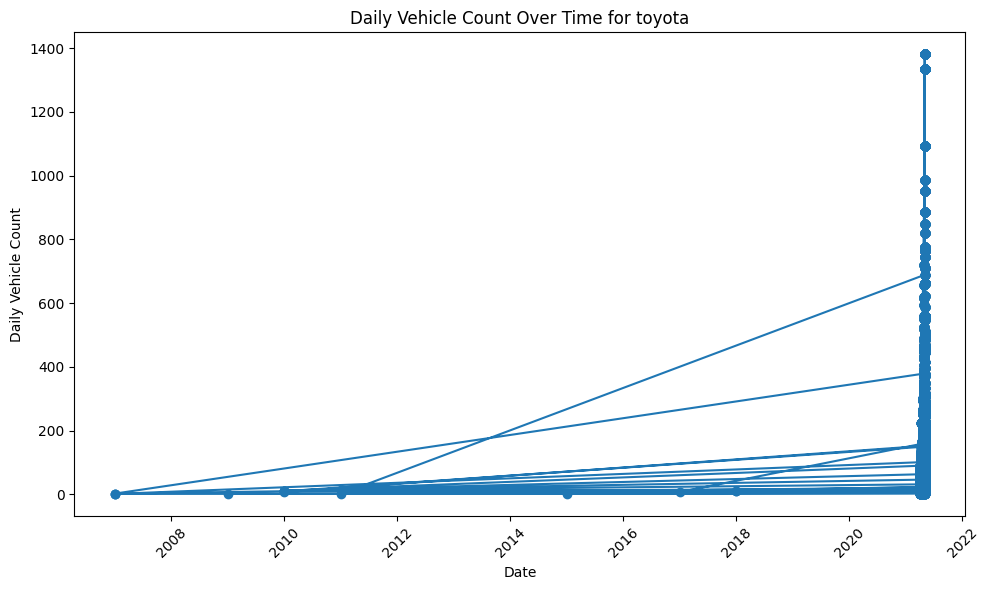

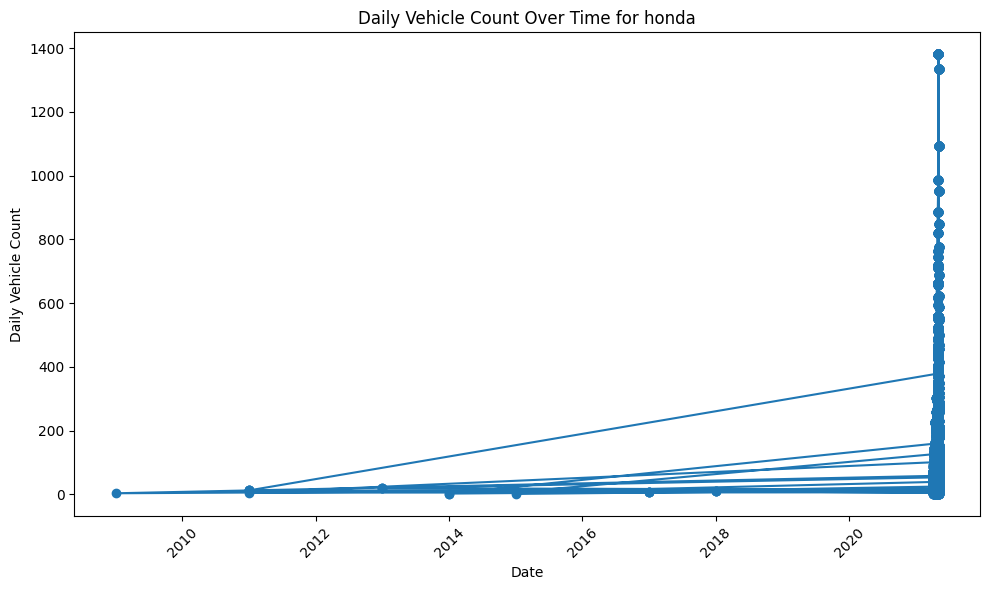

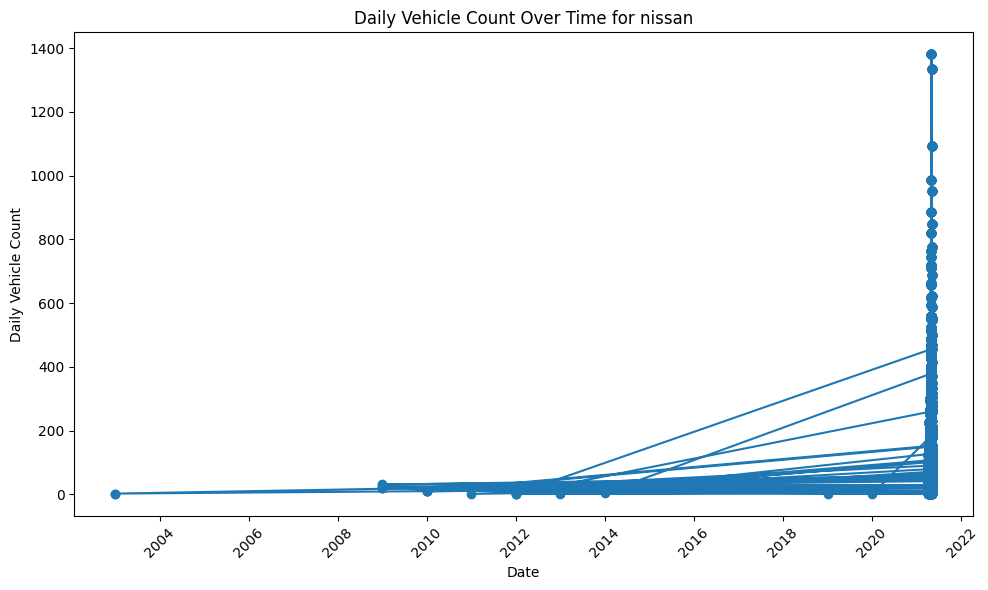

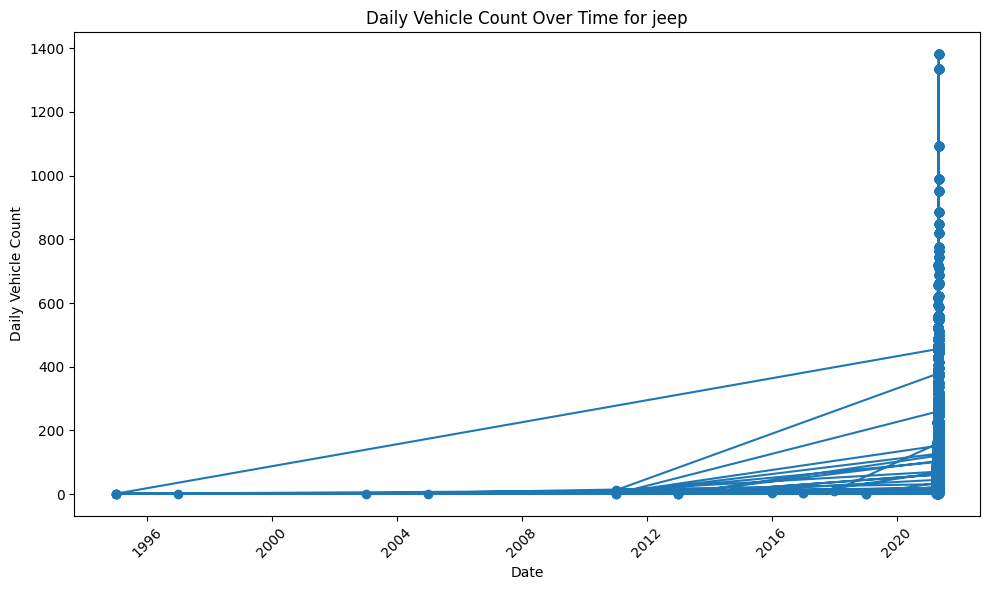

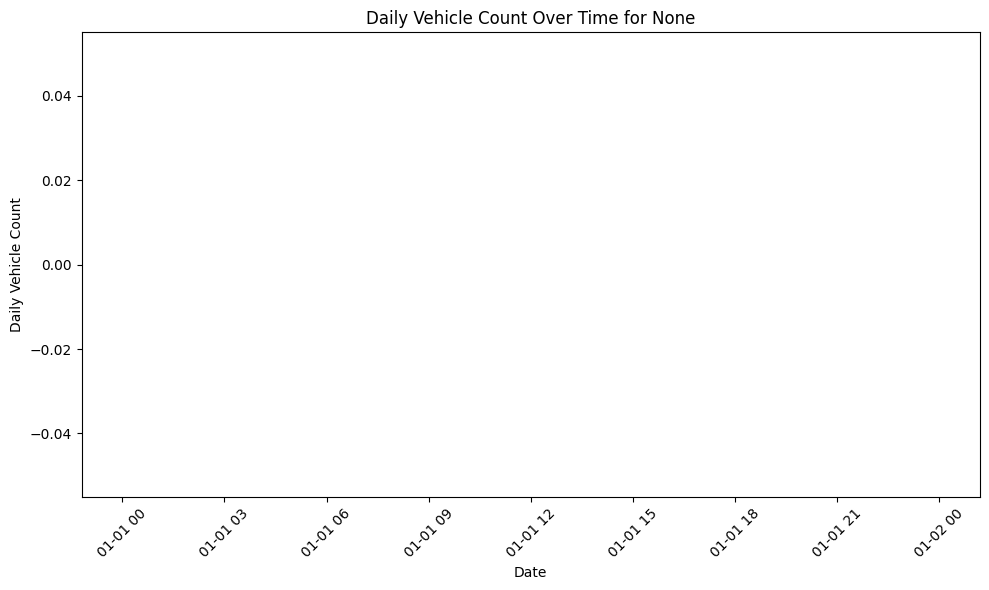

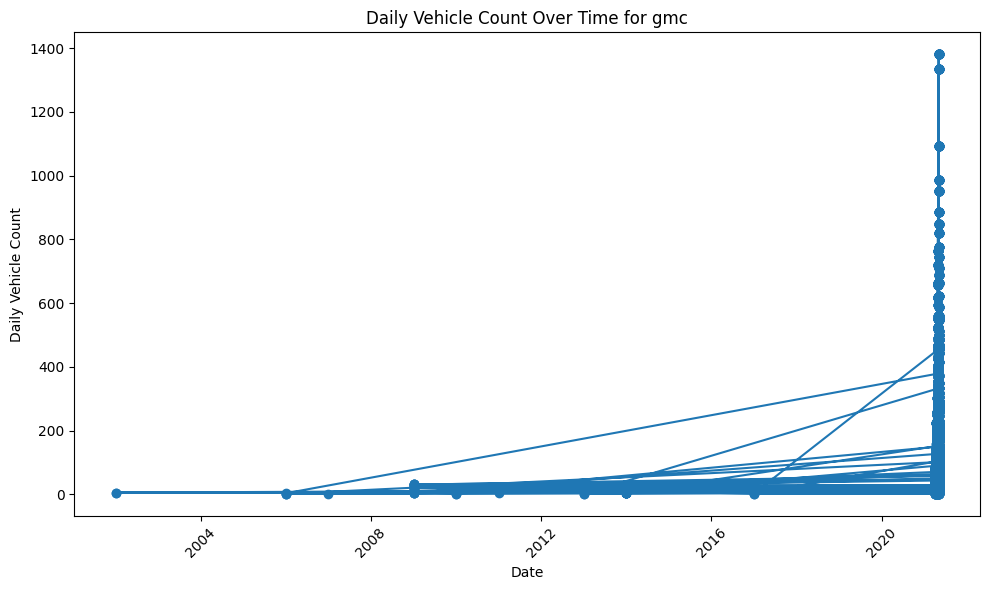

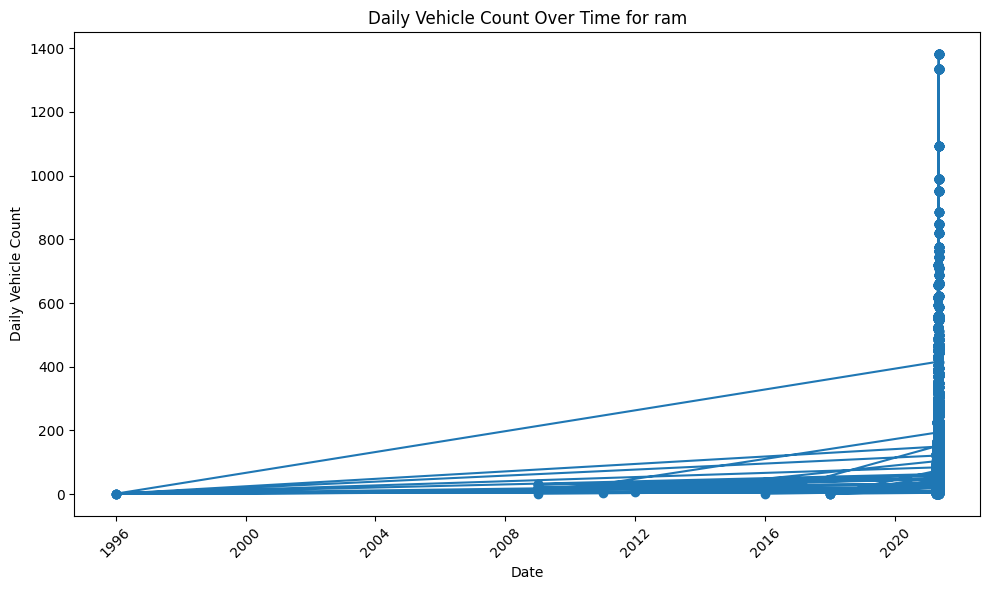

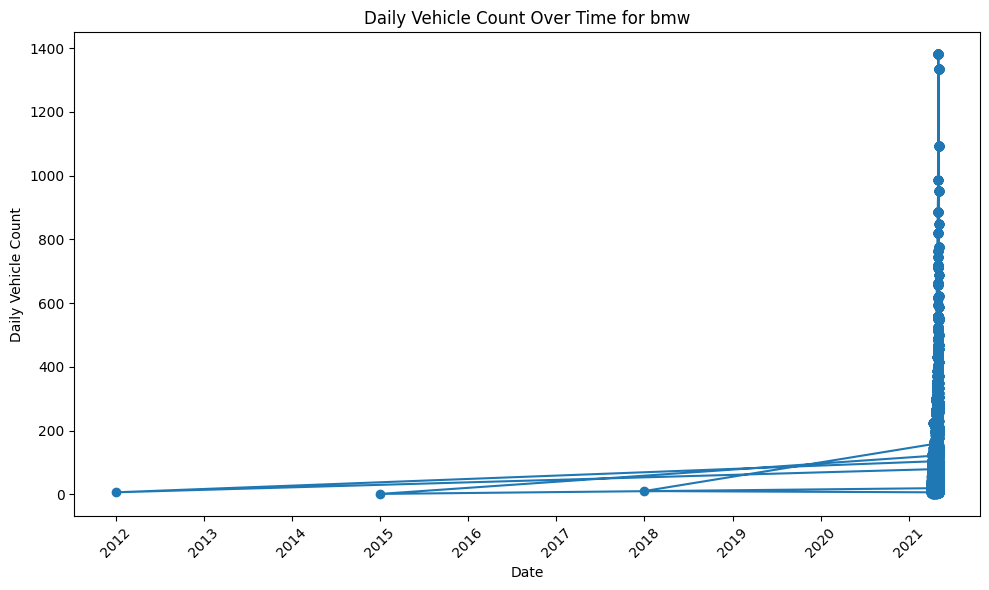

In [57]:
# Converting the DataFrame to Pandas for visualization
filtered_pandas_df_manufacturer = filtered_df_manufacturer.toPandas()

for manufacturer in top_10_manufacturer_list:
    manufacturer_data = filtered_pandas_df_manufacturer[filtered_pandas_df_manufacturer['manufacturer'] == manufacturer]

    plt.figure(figsize=(10, 6))
    plt.plot(manufacturer_data['posting_date_day'], manufacturer_data['daily_count'], marker='o')
    plt.xlabel("Date")
    plt.ylabel("Daily Vehicle Count")
    plt.title(f"Daily Vehicle Count Over Time for {manufacturer}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  se

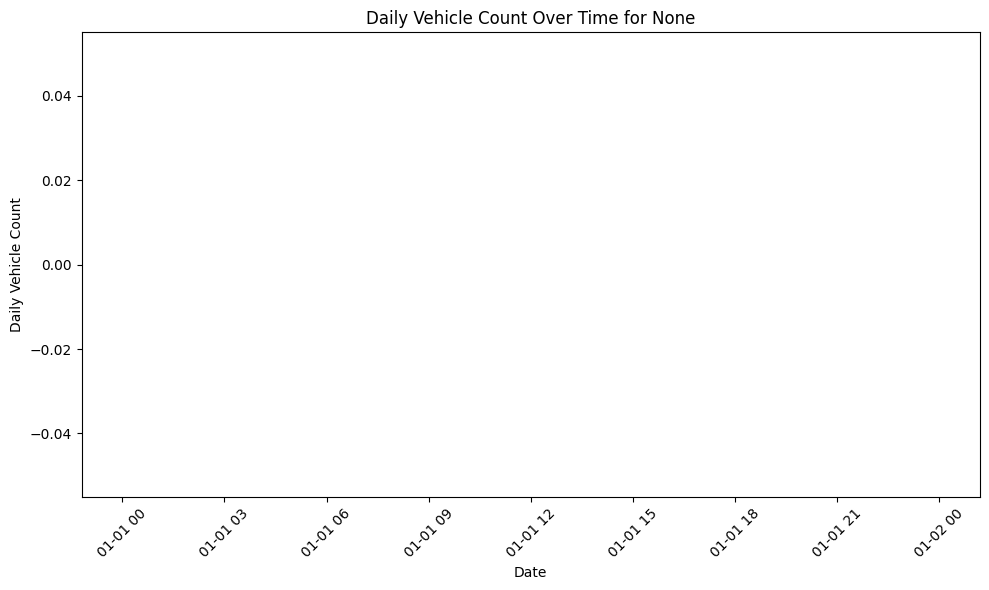

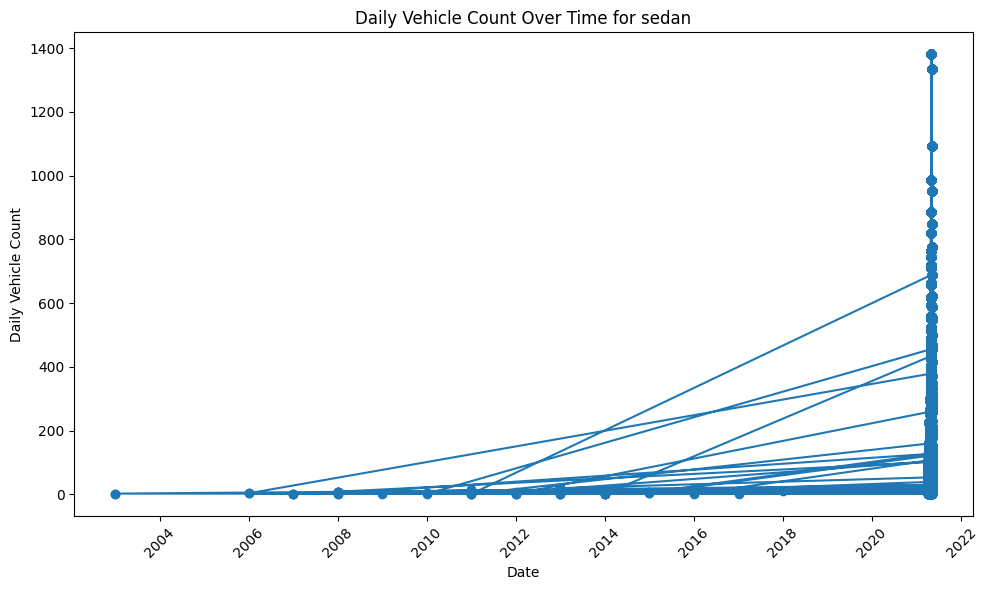

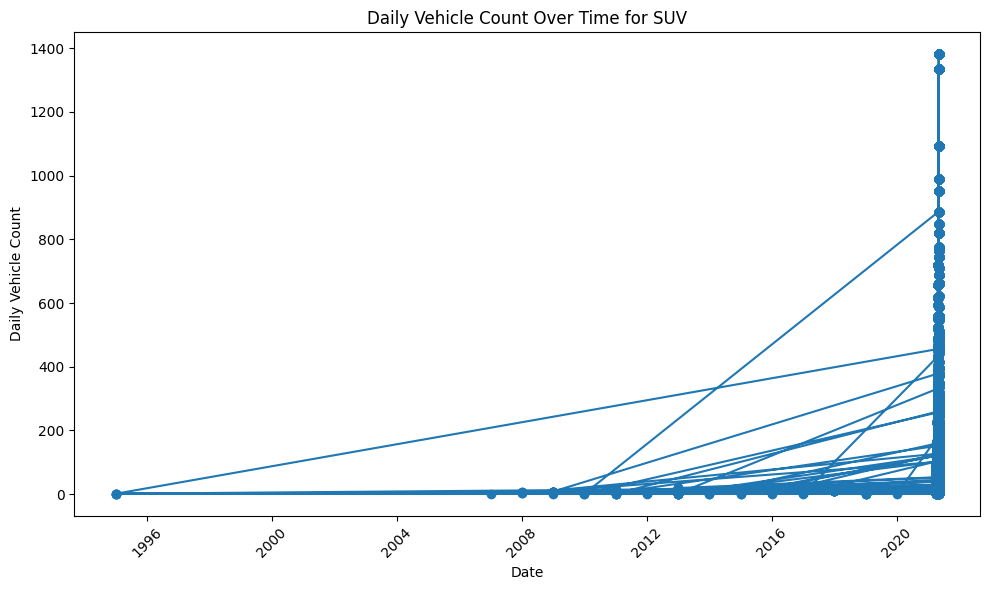

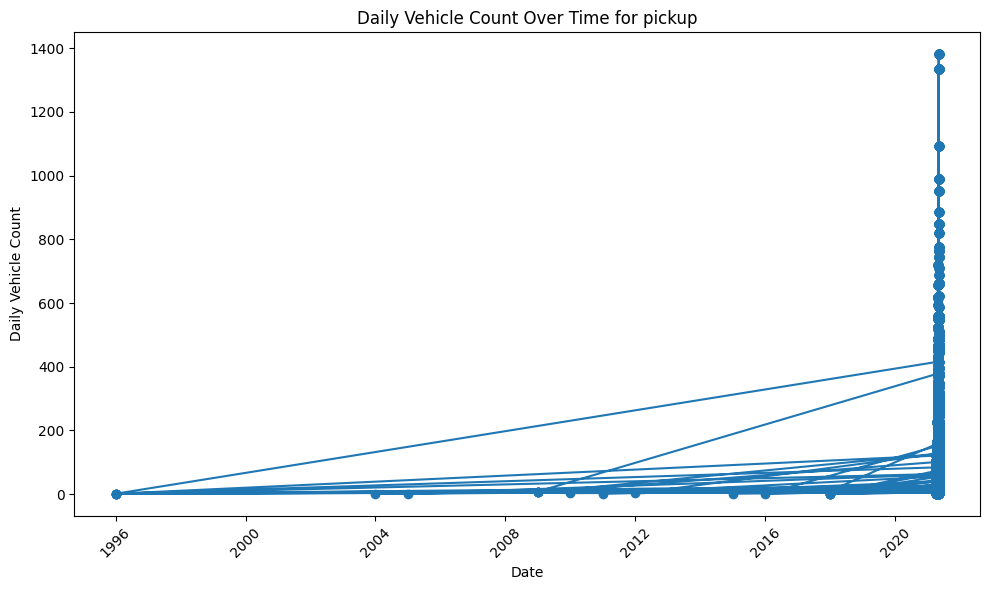

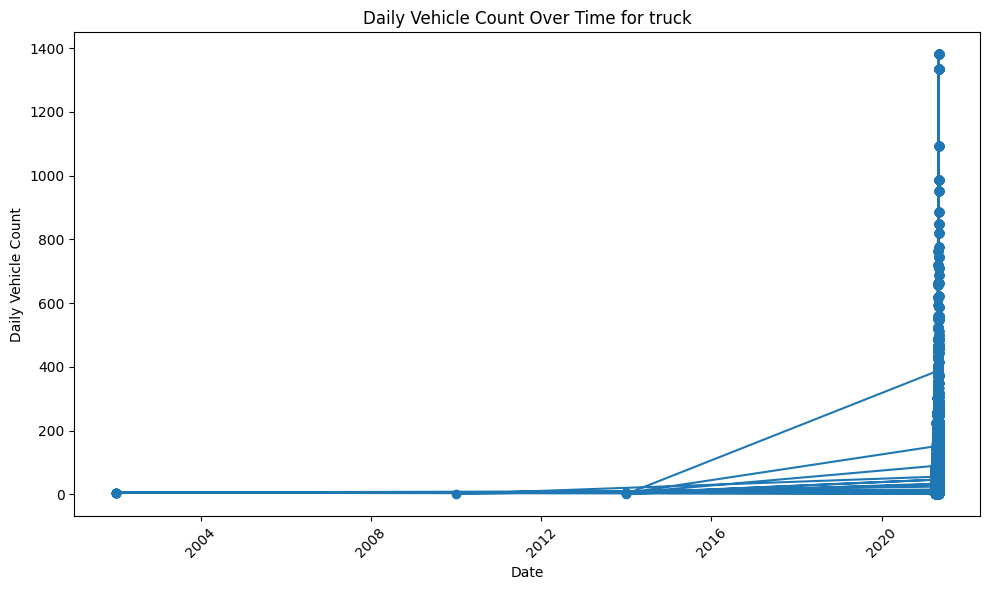

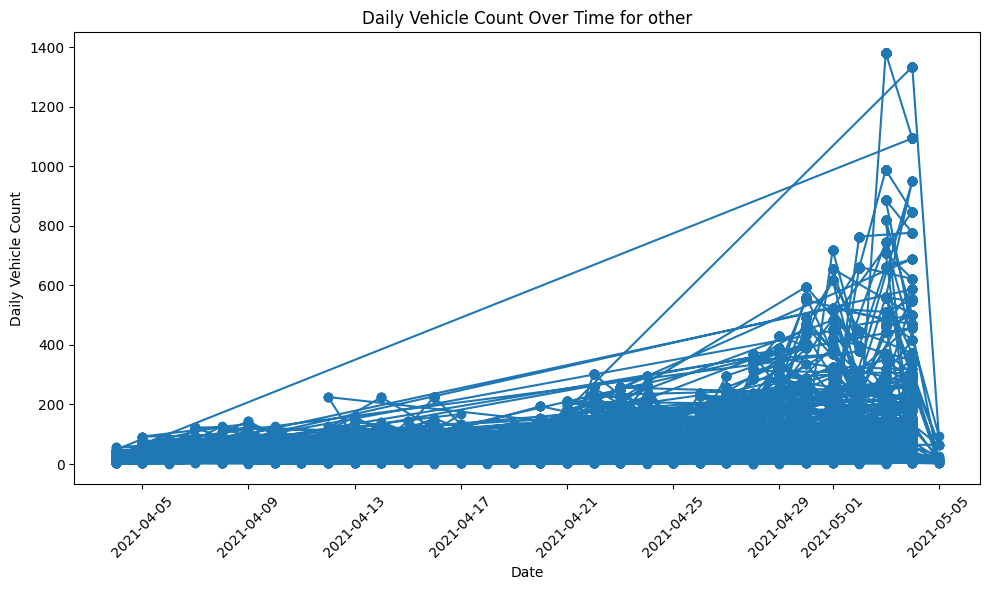

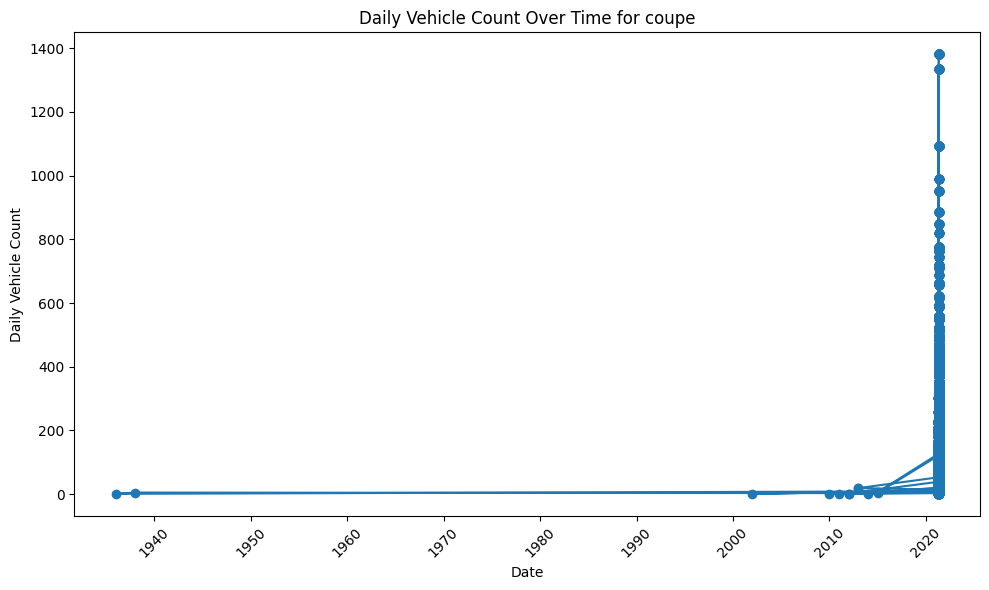

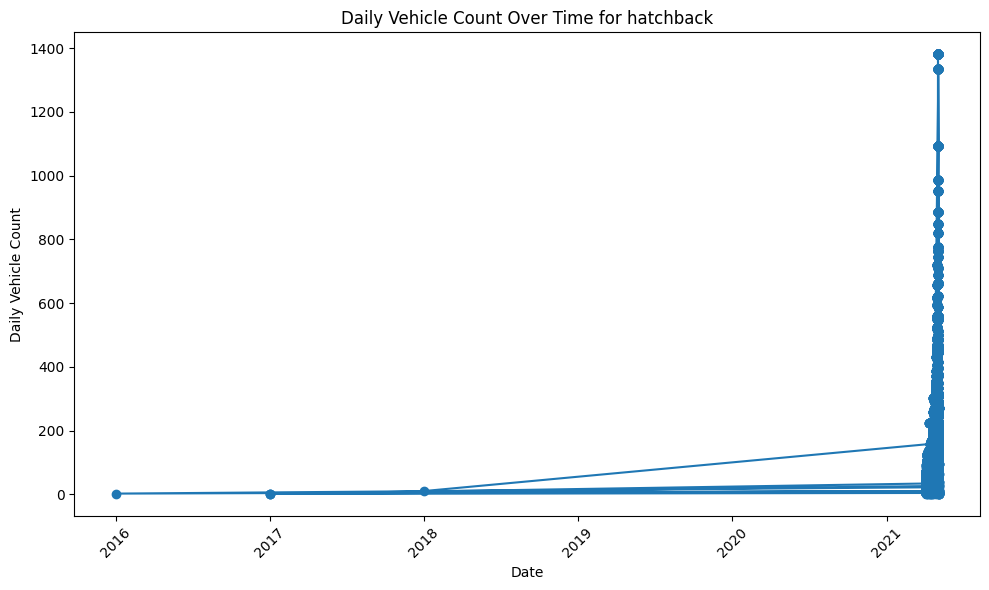

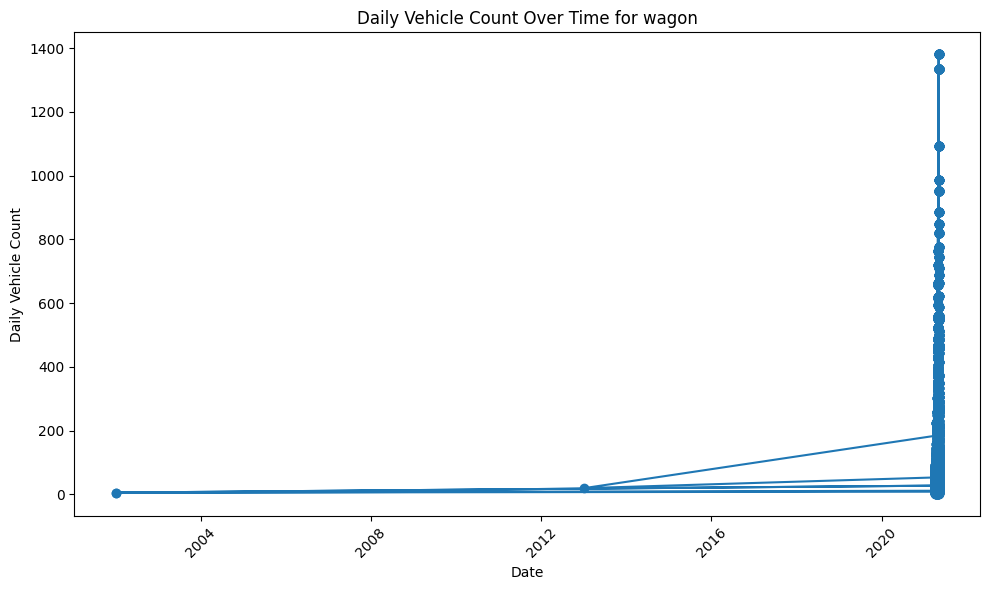

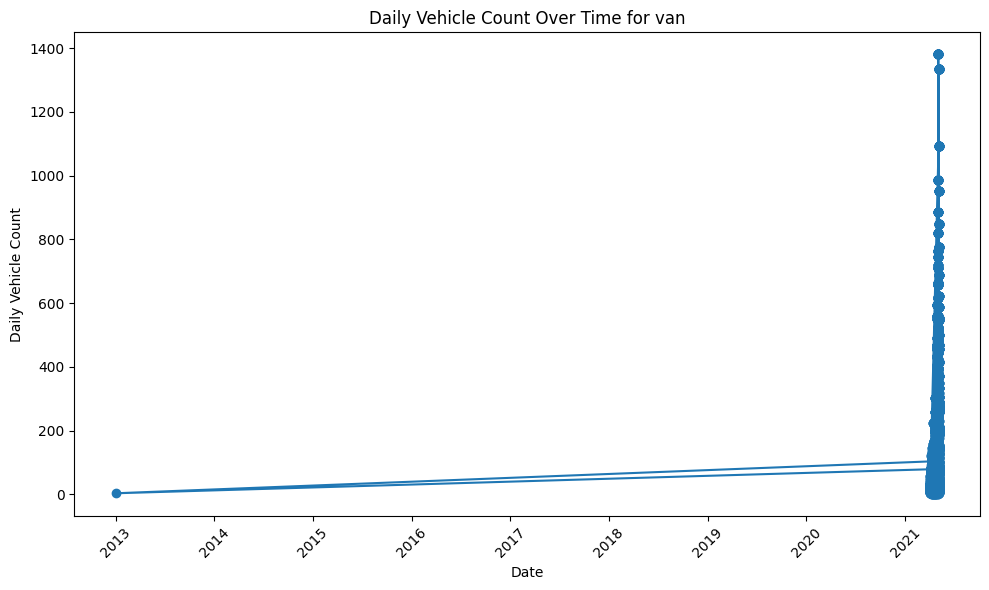

In [59]:
# Converting the DataFrame to Pandas for visualization
filtered_pandas_df_type = filtered_df_type.toPandas()


for type in top_10_vehicle_type_list:
    type_data = filtered_pandas_df_type[filtered_pandas_df_type['type'] == type]

    plt.figure(figsize=(10, 6))
    plt.plot(type_data['posting_date_day'], type_data['daily_count'], marker='o')
    plt.xlabel("Date")
    plt.ylabel("Daily Vehicle Count")
    plt.title(f"Daily Vehicle Count Over Time for {type}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
filtered_pandas_df

,id,region,year,manufacturer,model,type,lat,long,posting_date,daily_count,weekly_count,monthly_count,quarterly_count,posting_date_day,posting_week,posting_month
0,7305354072,central NJ,2008.0,mercedes-benz,s 550 4matic,sedan,40.245800,-74.276800,2021-04-11,68,68,2246,2784,2021-04-11,2021-04-05,2021-04-01
1,7305354115,central NJ,2013.0,mercedes-benz,glk glk 350 4matic,SUV,40.245800,-74.276800,2021-04-11,68,68,2246,2784,2021-04-11,2021-04-05,2021-04-01
2,7305353155,central NJ,2015.0,hyundai,genesis 3.8l g8,sedan,40.245800,-74.276800,2021-04-11,68,68,2246,2784,2021-04-11,2021-04-05,2021-04-01
3,7305353988,central NJ,2015.0,mercedes-benz,e 400 4matic,sedan,40.245800,-74.276800,2021-04-11,68,68,2246,2784,2021-04-11,2021-04-05,2021-04-01
4,7305353078,central NJ,2018.0,hyundai,sonata se,sedan,40.245800,-74.276800,2021-04-11,68,68,2246,2784,2021-04-11,2021-04-05,2021-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,7316744059,"st louis, MO",1955.0,ford,fairlane,None,38.967000,-91.212600,2021-05-04,186,396,711,2747,2021-05-04,2021-05-03,2021-05-01
27652,7316641706,"st louis, MO",2002.0,pontiac,grand prix,None,38.557600,-90.492400,2021-05-04,186,396,711,2747,2021-05-04,2021-05-03,2021-05-01
27653,7316531719,"st louis, MO",2010.0,chevrolet,equinox ls,SUV,38.540349,-90.992987,2021-05-04,186,396,711,2747,2021-05-04,2021-05-03,2021-05-01
27654,7316845648,"st louis, MO",2005.0,chevrolet,silverado,pickup,38.802000,-90.853400,2021-05-04,186,396,711,2747,2021-05-04,2021-05-03,2021-05-01


In [ ]:
import statsmodels.api as smapi

In [ ]:

#Training ARIMA model for a specific region
region_data = filtered_pandas_df[filtered_pandas_df["region"] == "columbus"]
model = smapi.tsa.arima.ARIMA(region_data["daily_count"], order=(1, 1, 2))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            daily_count   No. Observations:                 2931
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -8813.360
Date:                Sun, 20 Aug 2023   AIC                          17634.719
Time:                        19:43:32   BIC                          17658.650
Sample:                             0   HQIC                         17643.337
                               - 2931                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       6.906e-05      0.010      0.007      0.995      -0.020       0.020
ma.L1      -6.906e-05      0.010     -0.007      0.995      -0.020       0.020
ma.L2      -4.743e-06    149.142  -3.18e-08      1.0

In [ ]:
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)
print("Forecast:", forecast)

Forecast: 2931    10.0
2932    10.0
2933    10.0
2934    10.0
2935    10.0
2936    10.0
2937    10.0
2938    10.0
2939    10.0
2940    10.0
2941    10.0
2942    10.0
2943    10.0
2944    10.0
2945    10.0
2946    10.0
2947    10.0
2948    10.0
2949    10.0
2950    10.0
2951    10.0
2952    10.0
2953    10.0
2954    10.0
2955    10.0
2956    10.0
2957    10.0
2958    10.0
2959    10.0
2960    10.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
